In [1]:
import pandas as pd # for data wrangling
import seaborn as sns # for plotting
import matplotlib.pyplot as plt # for plotting
import missingno as msno # for visualizing missing values in data
import numpy as np # for array computations

plt.style.use('ggplot') # setting style for matplotlib

In [2]:
train_df = pd.read_csv("train.zip", compression = 'zip')

train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [3]:
train_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


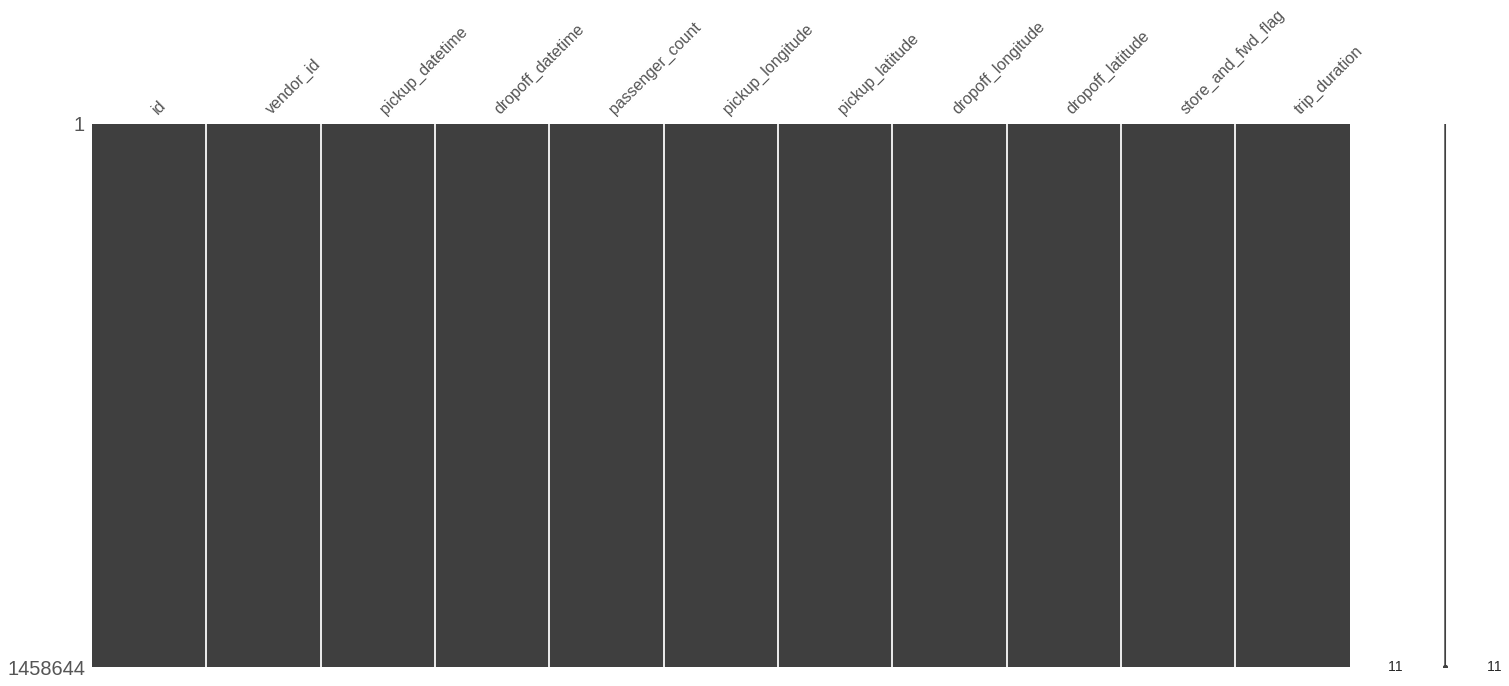

In [4]:
msno.matrix(train_df)

In [5]:
'''This function can take in dropoff_datetime and pickup_datetime columns.It then extracts 
   two new columns out of each, for instance, pickup_date and pickup_day'''


def get_day_date(col_name):
    original_datetime = train_df[col_name]
    original_datetime.tolist()
    
    dates_only = []
    
    for each_datetime in original_datetime:
        dates_only.append(each_datetime[:10])
    
    src_dest, _ = col_name.split('_')
    
    train_df[src_dest + '_date'] = dates_only
    train_df[src_dest + '_date'] = pd.to_datetime(train_df[src_dest + '_date'])
    
    train_df[src_dest + '_day'] = train_df[src_dest + '_date'].dt.weekday_name


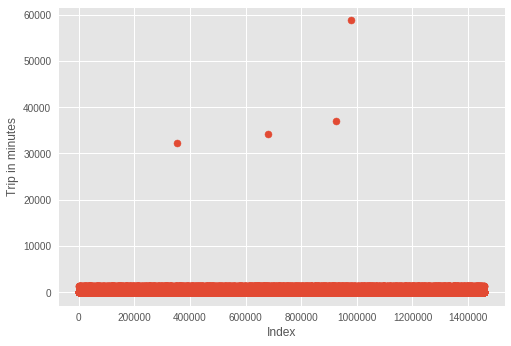

In [6]:
# Invoke the get_day_date function on pickup_datetime and dropoff_datetime columns

get_day_date('pickup_datetime')
get_day_date('dropoff_datetime')

# Adding a trip_duration in minutes column for clearer visualisations and understanding

train_df['trip_in_minutes'] = train_df['trip_duration']//60

# Searching for outliers with respect to the target variable, i.e, trip duration
# 4 outliers

plt.scatter(train_df.index, train_df['trip_in_minutes'])
plt.xlabel("Index")
plt.ylabel("Trip in minutes")
plt.show()


In [7]:
print(train_df[train_df['trip_in_minutes']>1440])
train_df = train_df[train_df['trip_in_minutes'] < 1440]

               id  vendor_id      pickup_datetime     dropoff_datetime  \
355003  id1864733          1  2016-01-05 00:19:42  2016-01-27 11:08:38   
680594  id0369307          1  2016-02-13 22:38:00  2016-03-08 15:57:38   
924150  id1325766          1  2016-01-05 06:14:15  2016-01-31 01:01:07   
978383  id0053347          1  2016-02-13 22:46:52  2016-03-25 18:18:14   

        passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
355003                1        -73.789650        40.643559         -73.956810   
680594                2        -73.921677        40.735252         -73.984749   
924150                1        -73.983788        40.742325         -73.985489   
978383                1        -73.783905        40.648632         -73.978271   

        dropoff_latitude store_and_fwd_flag  trip_duration pickup_date  \
355003         40.773087                  N        1939736  2016-01-05   
680594         40.759979                  N        2049578  2016-02-13   
9

In [8]:
def save_dataframe(dataframe, save_as):
    dataframe.to_csv(save_as + ".gz", mode = 'w', compression='gzip', index = 'False', encoding='UTF-8')
    test_df = pd.read_csv(save_as + ".gz", compression='gzip', encoding='UTF-8')
    del test_df['Unnamed: 0']
    
    if dataframe.equals(test_df):
        print("Test-passed: we recover the equivalent subgroup dataframe.")
    else:
        print("Warning -- equivalence test!!! Double-check.")

In [9]:
save_dataframe(train_df, 'train_day_date_minutes')

Warning -- equivalence test!!! Double-check.


In [10]:
def get_day_weekend(col_name):
    original_day=train_df[col_name]
    original_day.tolist()
    weekend_test=[]
    for each_day in original_day:
        if each_day=="Sunday" or each_day=="Saturday":
            weekend_test.append(0)
        else:
            weekend_test.append(1)
    src_dest, _ = col_name.split('_')
    
    train_df[src_dest + '_weekend'] = weekend_test
    
            

In [11]:
get_day_weekend('pickup_day')
get_day_weekend('dropoff_day')

In [12]:
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_day,dropoff_date,dropoff_day,trip_in_minutes,pickup_weekend,dropoff_weekend
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,Monday,2016-03-14,Monday,7,1,1
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,Sunday,2016-06-12,Sunday,11,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,Tuesday,2016-01-19,Tuesday,35,1,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,Wednesday,2016-04-06,Wednesday,7,1,1
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,Saturday,2016-03-26,Saturday,7,0,0


In [13]:
save_dataframe(train_df,'train_day_weekend_date_minutes')

Warning -- equivalence test!!! Double-check.
